In [1]:
import pandas as pd
import xlsxwriter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
dataset = pd.read_csv("DataFinal.csv", delimiter=";")

In [3]:
dataset.tail()

,Timestamp,NIM,Provinsi,Sinyal,Jurusan,Angkatan,Program,Gender,Job,IPK,...,MBI,T51,T52,T53,T54,TT5,MT5,IPK20191,IPK20192,IPK20201
335,11/02/2021 15:17,19150057,Jawa Barat,4G,MBS,2019,Reg,Male,Job,2.75 - 3.00,...,4.0,3,4,2,4.0,13,3.25,NaN,NaN,NaN
336,11/02/2021 15:31,18101083,Sumatera Barat,4G,MBS,2018,Reg,Female,No Job,3.51 - 4.00,...,2.5,4,4,1,3.0,12,3.00,3.61,3.83,3.69
337,13/02/2021 19:28,19103056,Jawa Barat,4G,ES,2019,Reg,Male,No Job,3.01 - 3.50,...,3.0,4,2,5,4.0,15,3.75,3.10,3.45,2.83
338,18/02/2021 09:18,18101067,DKI Jakarta,4G,MBS,2018,Reg,Female,No Job,2.75 - 3.00,...,3.0,4,3,5,4.0,16,4.00,2.69,3.41,3.25
339,16/03/2021 14:19,18102067,Jawa Barat,4G,AS,2018,Reg,Female,Job,3.51 - 4.00,...,4.5,4,5,5,4.0,18,4.50,3.70,3.61,3.88


In [4]:
dataset.shape

(340, 96)

In [5]:
dataset.isnull().sum()

Timestamp     0
NIM           0
Provinsi      0
Sinyal        0
Jurusan       0
             ..
TT5           0
 MT5          0
 IPK20191     8
 IPK20192     6
 IPK20201     6
Length: 96, dtype: int64

In [6]:
databaru = dataset.fillna(0)

In [7]:
databaru.isnull().sum()

Timestamp     0
NIM           0
Provinsi      0
Sinyal        0
Jurusan       0
             ..
TT5           0
 MT5          0
 IPK20191     0
 IPK20192     0
 IPK20201     0
Length: 96, dtype: int64

In [8]:
databaru = databaru.drop(['Timestamp'], axis=1)
databaru

,NIM,Provinsi,Sinyal,Jurusan,Angkatan,Program,Gender,Job,IPK,Pendekatan,...,MBI,T51,T52,T53,T54,TT5,MT5,IPK20191,IPK20192,IPK20201
0,18102043,Jawa Barat,4G,AS,2018,Reg,Female,No Job,2.75 - 3.00,Blended Learning,...,3.0,4,4,4,5.0,17,4.25,2.21,3.29,3.40
1,18102060,Kepulauan Bangka Belitung,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,4.0,5,5,4,4.0,18,4.50,2.73,3.10,3.42
2,18102006,DKI Jakarta,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,2.0,2,3,3,3.0,11,2.75,3.42,3.30,3.68
3,18102081,Riau,4G,AS,2018,Reg,Female,No Job,3.51 - 4.00,Kelas Virtual,...,2.0,4,3,1,4.0,12,3.00,3.48,3.66,3.76
4,19102028,Jawa Barat,4G,AS,2019,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,4.0,5,5,3,4.0,17,4.25,4.00,4.00,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,19150057,Jawa Barat,4G,MBS,2019,Reg,Male,Job,2.75 - 3.00,Kelas Virtual,...,4.0,3,4,2,4.0,13,3.25,0.00,0.00,0.00
336,18101083,Sumatera Barat,4G,MBS,2018,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,2.5,4,4,1,3.0,12,3.00,3.61,3.83,3.69
337,19103056,Jawa Barat,4G,ES,2019,Reg,Male,No Job,3.01 - 3.50,Kelas Virtual,...,3.0,4,2,5,4.0,15,3.75,3.10,3.45,2.83
338,18101067,DKI Jakarta,4G,MBS,2018,Reg,Female,No Job,2.75 - 3.00,Blended Learning,...,3.0,4,3,5,4.0,16,4.00,2.69,3.41,3.25


In [9]:
pd.set_option('display.max_rows', databaru.shape[0]+1)

In [10]:
databaru

,NIM,Provinsi,Sinyal,Jurusan,Angkatan,Program,Gender,Job,IPK,Pendekatan,...,MBI,T51,T52,T53,T54,TT5,MT5,IPK20191,IPK20192,IPK20201
0,18102043,Jawa Barat,4G,AS,2018,Reg,Female,No Job,2.75 - 3.00,Blended Learning,...,3.0,4,4,4,5.0,17,4.25,2.21,3.29,3.40
1,18102060,Kepulauan Bangka Belitung,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,4.0,5,5,4,4.0,18,4.50,2.73,3.10,3.42
2,18102006,DKI Jakarta,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,2.0,2,3,3,3.0,11,2.75,3.42,3.30,3.68
3,18102081,Riau,4G,AS,2018,Reg,Female,No Job,3.51 - 4.00,Kelas Virtual,...,2.0,4,3,1,4.0,12,3.00,3.48,3.66,3.76
4,19102028,Jawa Barat,4G,AS,2019,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,4.0,5,5,3,4.0,17,4.25,4.00,4.00,3.98
5,19102035,DKI Jakarta,4G,AS,2019,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,3.5,4,4,2,4.0,14,3.50,3.15,4.00,3.79
6,18102001,Jawa Barat,4G,AS,2018,ITL,Male,No Job,3.51 - 4.00,Blended Learning,...,4.5,5,4,4,4.0,17,4.25,3.82,3.82,3.88
7,18101008,Jawa Barat,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,4.0,4,4,3,4.0,15,3.75,3.81,3.57,3.37
8,18102082,Jawa Barat,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,E-Learning,...,3.0,5,5,3,4.0,17,4.25,3.15,3.26,3.58
9,19102069,Kalimantan Timur,4G,AS,2019,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,3.0,5,5,5,5.0,20,5.00,3.85,3.68,3.98


In [11]:
pd.set_option('display.max_rows', 10)

In [12]:
databaru

,NIM,Provinsi,Sinyal,Jurusan,Angkatan,Program,Gender,Job,IPK,Pendekatan,...,MBI,T51,T52,T53,T54,TT5,MT5,IPK20191,IPK20192,IPK20201
0,18102043,Jawa Barat,4G,AS,2018,Reg,Female,No Job,2.75 - 3.00,Blended Learning,...,3.0,4,4,4,5.0,17,4.25,2.21,3.29,3.40
1,18102060,Kepulauan Bangka Belitung,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,4.0,5,5,4,4.0,18,4.50,2.73,3.10,3.42
2,18102006,DKI Jakarta,4G,AS,2018,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,2.0,2,3,3,3.0,11,2.75,3.42,3.30,3.68
3,18102081,Riau,4G,AS,2018,Reg,Female,No Job,3.51 - 4.00,Kelas Virtual,...,2.0,4,3,1,4.0,12,3.00,3.48,3.66,3.76
4,19102028,Jawa Barat,4G,AS,2019,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,4.0,5,5,3,4.0,17,4.25,4.00,4.00,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,19150057,Jawa Barat,4G,MBS,2019,Reg,Male,Job,2.75 - 3.00,Kelas Virtual,...,4.0,3,4,2,4.0,13,3.25,0.00,0.00,0.00
336,18101083,Sumatera Barat,4G,MBS,2018,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,2.5,4,4,1,3.0,12,3.00,3.61,3.83,3.69
337,19103056,Jawa Barat,4G,ES,2019,Reg,Male,No Job,3.01 - 3.50,Kelas Virtual,...,3.0,4,2,5,4.0,15,3.75,3.10,3.45,2.83
338,18101067,DKI Jakarta,4G,MBS,2018,Reg,Female,No Job,2.75 - 3.00,Blended Learning,...,3.0,4,3,5,4.0,16,4.00,2.69,3.41,3.25


In [13]:
databaru.dtypes

NIM             int64
Provinsi       object
Sinyal         object
Jurusan        object
Angkatan        int64
               ...   
TT5             int64
 MT5          float64
 IPK20191     float64
 IPK20192     float64
 IPK20201     float64
Length: 95, dtype: object

In [14]:
databaru.select_dtypes(include=['number'])

,NIM,Angkatan,SRC01,SRC02,SRC03,SRC04,SRC05,SRC06,TSRC,MSRC,...,MBI,T51,T52,T53,T54,TT5,MT5,IPK20191,IPK20192,IPK20201
0,18102043,2018,3.0,4.0,3.0,4,5,3,22,3.67,...,3.0,4,4,4,5.0,17,4.25,2.21,3.29,3.40
1,18102060,2018,3.0,3.0,3.0,3,3,3,18,3.00,...,4.0,5,5,4,4.0,18,4.50,2.73,3.10,3.42
2,18102006,2018,2.0,4.0,3.0,2,4,2,17,2.83,...,2.0,2,3,3,3.0,11,2.75,3.42,3.30,3.68
3,18102081,2018,1.0,5.0,5.0,3,5,2,21,3.50,...,2.0,4,3,1,4.0,12,3.00,3.48,3.66,3.76
4,19102028,2019,4.0,2.0,4.0,4,4,3,21,3.50,...,4.0,5,5,3,4.0,17,4.25,4.00,4.00,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,19150057,2019,2.0,4.0,4.0,3,4,4,21,3.50,...,4.0,3,4,2,4.0,13,3.25,0.00,0.00,0.00
336,18101083,2018,3.0,2.0,4.0,3,4,4,20,3.33,...,2.5,4,4,1,3.0,12,3.00,3.61,3.83,3.69
337,19103056,2019,3.0,4.0,3.0,2,3,1,16,2.67,...,3.0,4,2,5,4.0,15,3.75,3.10,3.45,2.83
338,18101067,2018,3.0,5.0,3.0,3,5,5,24,4.00,...,3.0,4,3,5,4.0,16,4.00,2.69,3.41,3.25


In [15]:
databaru.select_dtypes(include=['object'])

,Provinsi,Sinyal,Jurusan,Program,Gender,Job,IPK,Pendekatan,Peralatan,Durasi Internet,Durasi E-Learning,Comp_Experience
0,Jawa Barat,4G,AS,Reg,Female,No Job,2.75 - 3.00,Blended Learning,Laptop/Komputer,> 6 jam,5-6 jam,> 6 tahun
1,Kepulauan Bangka Belitung,4G,AS,Reg,Female,No Job,3.01 - 3.50,Blended Learning,Laptop/Komputer,> 6 jam,5-6 jam,> 6 tahun
2,DKI Jakarta,4G,AS,Reg,Female,No Job,3.01 - 3.50,Blended Learning,Laptop/Komputer,> 6 jam,3-4 jam,3-4 tahun
3,Riau,4G,AS,Reg,Female,No Job,3.51 - 4.00,Kelas Virtual,Handphone,> 6 jam,< 1 jam,> 6 tahun
4,Jawa Barat,4G,AS,Reg,Female,No Job,3.51 - 4.00,Blended Learning,Laptop/Komputer,5-6 jam,1-2 jam,5-6 tahun
...,...,...,...,...,...,...,...,...,...,...,...,...
335,Jawa Barat,4G,MBS,Reg,Male,Job,2.75 - 3.00,Kelas Virtual,Handphone,3-4 jam,< 1 jam,3-4 tahun
336,Sumatera Barat,4G,MBS,Reg,Female,No Job,3.51 - 4.00,Blended Learning,Laptop/Komputer,5-6 jam,1-2 jam,3-4 tahun
337,Jawa Barat,4G,ES,Reg,Male,No Job,3.01 - 3.50,Kelas Virtual,Handphone,3-4 jam,< 1 jam,3-4 tahun
338,DKI Jakarta,4G,MBS,Reg,Female,No Job,2.75 - 3.00,Blended Learning,Laptop/Komputer,> 6 jam,3-4 jam,> 6 tahun


In [16]:
databaru[databaru.TINI == databaru.TINI.max()]

,NIM,Provinsi,Sinyal,Jurusan,Angkatan,Program,Gender,Job,IPK,Pendekatan,...,MBI,T51,T52,T53,T54,TT5,MT5,IPK20191,IPK20192,IPK20201
35,17101231,Kepulauan Bangka Belitung,4G,MBS,2017,Reg,Female,Job,3.51 - 4.00,Blended Learning,...,4.0,3,4,1,3.0,11,2.75,3.61,3.63,3.82
50,18103010,Sumatera Utara,4G,ES,2018,ITL,Female,Job,3.01 - 3.50,E-Learning,...,5.0,5,2,1,5.0,13,3.25,3.19,3.01,3.43
83,19103054,Jawa Timur,4G,ES,2019,Reg,Female,Job,3.51 - 4.00,Kelas Virtual,...,5.0,5,5,5,5.0,20,5.00,4.00,3.60,3.92
185,18103024,Jawa Barat,4G,ES,2018,ITL,Female,No Job,3.51 - 4.00,Blended Learning,...,4.0,3,4,2,4.0,13,3.25,3.77,3.84,3.49
215,19103036,Jawa Barat,4G,ES,2019,Reg,Male,No Job,3.01 - 3.50,Blended Learning,...,4.0,5,5,5,5.0,20,5.00,3.33,3.25,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,19102022,Jawa Barat,4G,AS,2019,Reg,Female,No Job,3.51 - 4.00,Blended Learning,...,5.0,4,4,4,5.0,17,4.25,3.75,3.53,3.85
266,18103075,Kepulauan Bangka Belitung,4G,ES,2018,Reg,Male,Job,3.01 - 3.50,Blended Learning,...,3.5,3,5,3,4.0,15,3.75,3.52,3.33,2.95
282,18101221,Nusa Tenggara Barat,4G,MBS,2018,Reg,Male,Job,3.01 - 3.50,Blended Learning,...,5.0,4,4,4,5.0,17,4.25,3.23,3.70,3.79
300,17102015,Lampung,4G,AS,2017,Reg,Female,No Job,3.01 - 3.50,Blended Learning,...,5.0,3,3,3,4.0,13,3.25,3.16,3.20,3.65


In [43]:
databaru['SRC01']=databaru['SRC01'].astype(float)
databaru['SRC02']=databaru['SRC02'].astype(float)
databaru['SRC03']=databaru['SRC03'].astype(float)
databaru['SRC04']=databaru['SRC04'].astype(float)
databaru['SRC05']=databaru['SRC05'].astype(float)
databaru['SRC06']=databaru['SRC06'].astype(float)
databaru['TSRC']=databaru['TSRC'].astype(float)

databaru['TLCC01']=databaru['TLCC01'].astype(float)
databaru['TLCC02']=databaru['TLCC02'].astype(float)
databaru['TLCC03']=databaru['TLCC03'].astype(float)
databaru['TLCC04']=databaru['TLCC04'].astype(float)
databaru['TLCC05']=databaru['TLCC05'].astype(float)
databaru['TLCC06']=databaru['TLCC06'].astype(float)
databaru['TLCC07']=databaru['TLCC07'].astype(float)
databaru['TLCC08']=databaru['TLCC08'].astype(float)
databaru['TLCC09']=databaru['TLCC09'].astype(float)
databaru['TLCC10']=databaru['TLCC10'].astype(float)
databaru['TTLCC']=databaru['TTLCC'].astype(float)

databaru['TBA01']=databaru['TBA01'].astype(float)
databaru['TBA02']=databaru['TBA02'].astype(float)
databaru['TBA03']=databaru['TBA03'].astype(float)
databaru['TBA04']=databaru['TBA04'].astype(float)
databaru['TBA05']=databaru['TBA05'].astype(float)
databaru['TTBA']=databaru['TTBA'].astype(float)

databaru['SIC01']=databaru['SIC01'].astype(float)
databaru['SIC02']=databaru['SIC02'].astype(float)
databaru['SIC03']=databaru['SIC03'].astype(float)
databaru['SIC04']=databaru['SIC04'].astype(float)
databaru['SIC05']=databaru['SIC05'].astype(float)
databaru['TSIC']=databaru['TSIC'].astype(float)

databaru['TSC01']=databaru['TSC01'].astype(float)
databaru['TSC02']=databaru['TSC02'].astype(float)
databaru['TSC03']=databaru['TSC03'].astype(float)
databaru['TSC04']=databaru['TSC04'].astype(float)
databaru['TSC05']=databaru['TSC05'].astype(float)
databaru['TSC']=databaru['TSC'].astype(float)

databaru['TCC01']=databaru['TCC01'].astype(float)
databaru['TCC02']=databaru['TCC02'].astype(float)
databaru['TCC03']=databaru['TCC03'].astype(float)
databaru['TTCC']=databaru['TTCC'].astype(float)

databaru['INI1']=databaru['INI1'].astype(float)
databaru['INI2']=databaru['INI2'].astype(float)
databaru['INI3']=databaru['INI3'].astype(float)
databaru['INI4']=databaru['INI4'].astype(float)
databaru['INI5']=databaru['INI5'].astype(float)
databaru['INI6']=databaru['INI6'].astype(float)
databaru['INI7']=databaru['INI7'].astype(float)
databaru['INI8']=databaru['INI8'].astype(float)
databaru['TINI']=databaru['TINI'].astype(float)

databaru['PU1']=databaru['PU1'].astype(float)
databaru['PU2']=databaru['PU2'].astype(float)
databaru['PU3']=databaru['PU3'].astype(float)
databaru['PU4']=databaru['PU4'].astype(float)
databaru['PU5']=databaru['PU5'].astype(float)
databaru['TPU']=databaru['TPU'].astype(float)

databaru['PEOU01']=databaru['PEOU01'].astype(float)
databaru['PEOU02']=databaru['PEOU02'].astype(float)
databaru['PEOU03']=databaru['PEOU03'].astype(float)
databaru['TPEOU']=databaru['TPEOU'].astype(float)

databaru['BI01']=databaru['BI01'].astype(float)
databaru['BI02']=databaru['BI02'].astype(float)
databaru['TBI']=databaru['TBI'].astype(float)

databaru['T51']=databaru['T51'].astype(float)
databaru['T52']=databaru['T52'].astype(float)
databaru['T53']=databaru['T53'].astype(float)
databaru['T54']=databaru['T54'].astype(float)
databaru['TT5']=databaru['TT5'].astype(float)


In [69]:
databaru['MSRC']=databaru['MSRC'].astype(float)
databaru['MTLCC']=databaru['MTLCC'].astype(float)
databaru['MTBA']=databaru['MTBA'].astype(float)
databaru['MSIC']=databaru['MSIC'].astype(float)
databaru['MTSC']=databaru['MTSC'].astype(float)
databaru['MTCC']=databaru['MTCC'].astype(float)
databaru['MINI']=databaru['MINI'].astype(float)
databaru['MPU']=databaru['MPU'].astype(float)
databaru['MPEOU']=databaru['MPEOU'].astype(float)
databaru['MBI']=databaru['MBI'].astype(float)
databaru['MT5']=databaru['MT5'].astype(float)
databaru['IPK20191']=databaru['IPK20191'].astype(float)
databaru['IPK20192']=databaru['IPK20192'].astype(float)
databaru['IPK20201']=databaru['IPK20201'].astype(float)

KeyError: 'MSRC'

In [68]:
df.get('MSRC')

In [64]:
databaru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 95 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NIM                340 non-null    int64  
 1   Provinsi           340 non-null    object 
 2   Sinyal             340 non-null    object 
 3   Jurusan            340 non-null    object 
 4   Angkatan           340 non-null    int64  
 5   Program            340 non-null    object 
 6   Gender             340 non-null    object 
 7   Job                340 non-null    object 
 8   IPK                340 non-null    object 
 9   Pendekatan         340 non-null    object 
 10  Peralatan          340 non-null    object 
 11  Durasi Internet    340 non-null    object 
 12  Durasi E-Learning  340 non-null    object 
 13  Comp_Experience    340 non-null    object 
 14  SRC01              340 non-null    float64
 15  SRC02              340 non-null    float64
 16  SRC03              340 non

In [26]:
databaru.mean()

NIM           1.877285e+07
Angkatan      2.018165e+03
SRC01         3.058824e+00
SRC02         3.417647e+00
SRC03         3.744118e+00
                  ...     
TT5           1.522941e+01
 MT5          3.812735e+00
 IPK20191     3.316706e+00
 IPK20192     3.423647e+00
 IPK20201     3.477765e+00
Length: 83, dtype: float64

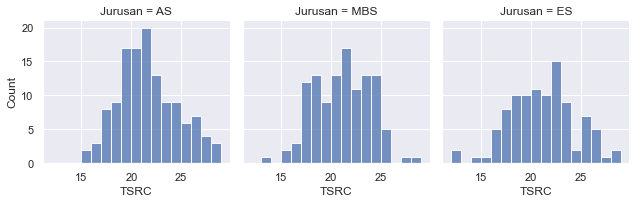

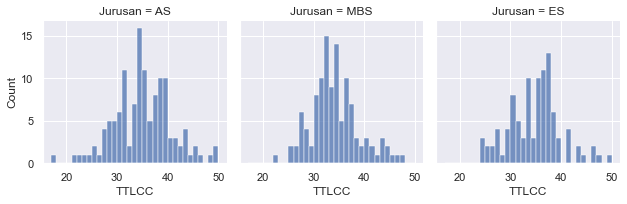

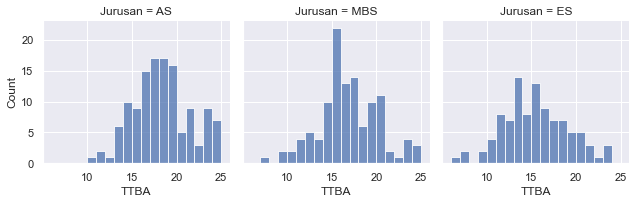

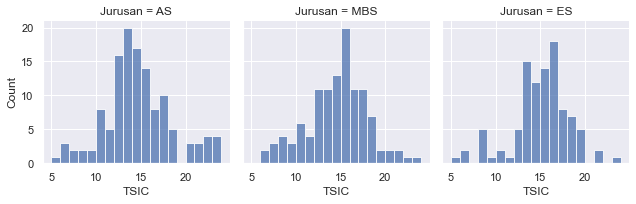

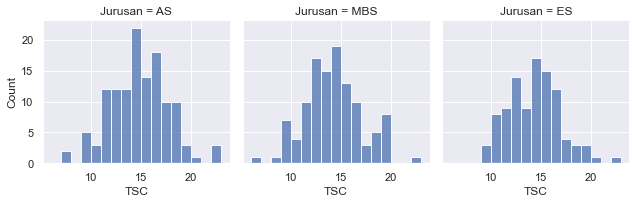

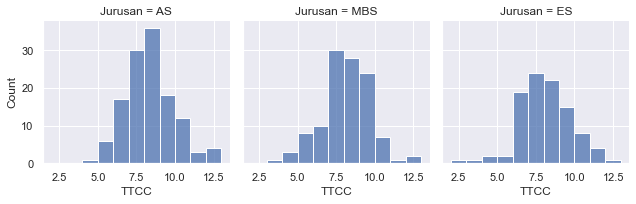

In [20]:
import seaborn as sns

sns.set_theme(style="darkgrid")
df = databaru
sns.displot(
    df, x="TSRC", col="Jurusan",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
df = databaru
sns.displot(
    df, x="TTLCC", col="Jurusan",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
df = databaru
sns.displot(
    df, x="TTBA", col="Jurusan",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
df = databaru
sns.displot(
    df, x="TSIC", col="Jurusan",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
df = databaru
sns.displot(
    df, x="TSC", col="Jurusan",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)

sns.set_theme(style="darkgrid")
df = databaru
sns.displot(
    df, x="TTCC", col="Jurusan",
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
);

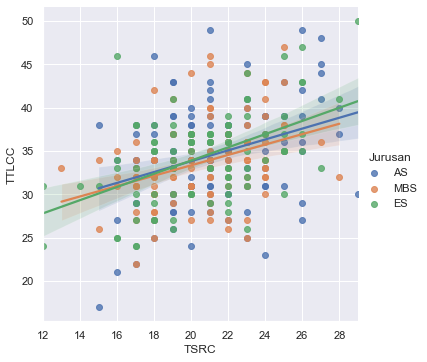

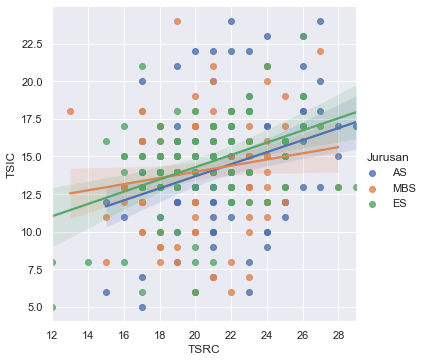

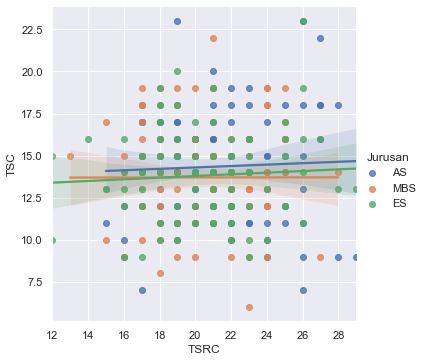

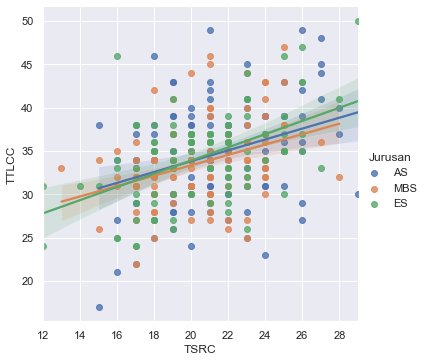

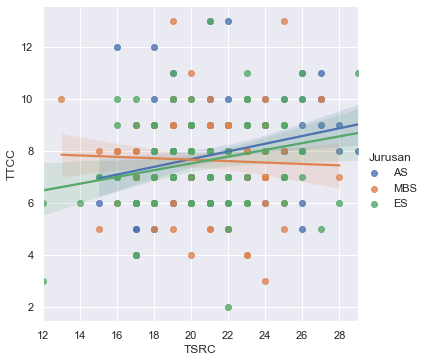

In [21]:
import seaborn as sns
sns.set_theme()

df = databaru
g = sns.lmplot(
    data=df,
    x="TSRC", y="TTLCC", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TSRC", y="TSIC", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TSRC", y="TSC", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TSRC", y="TTLCC", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TSRC", y="TTCC", hue="Jurusan",
    height=5
);

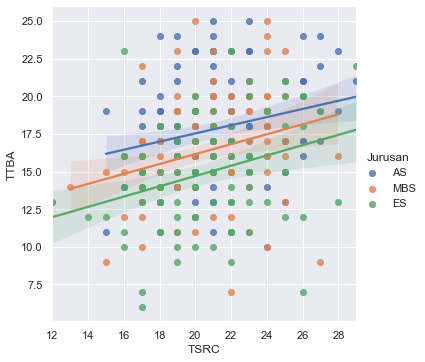

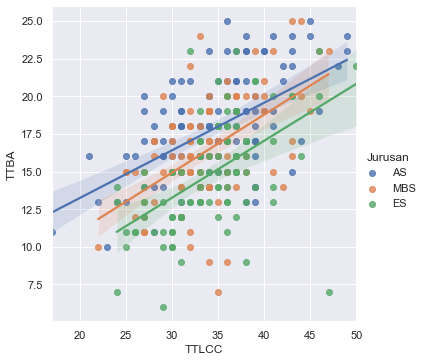

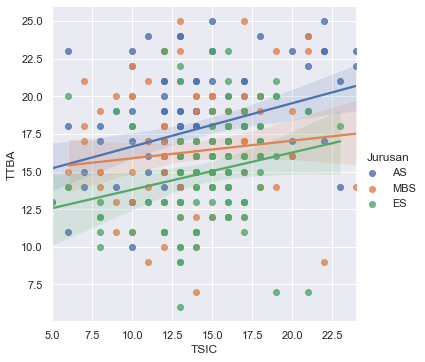

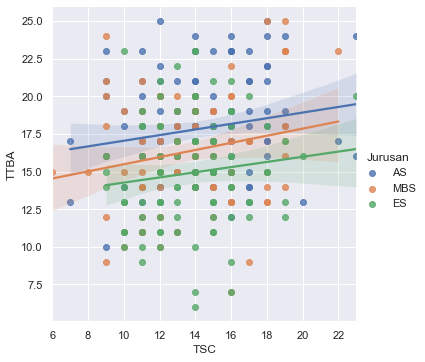

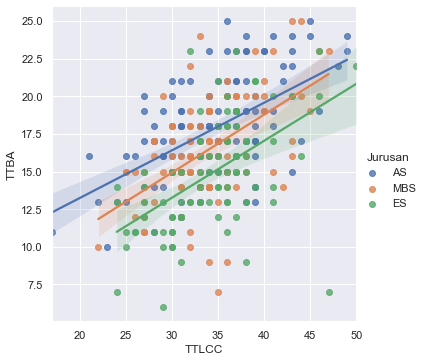

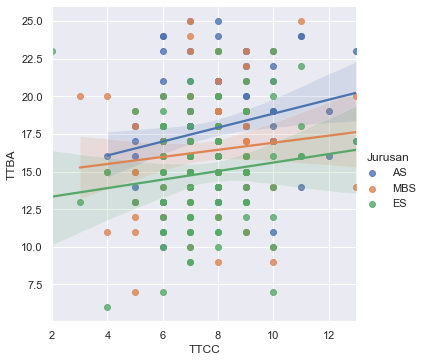

In [22]:
import seaborn as sns
sns.set_theme()

df = databaru
g = sns.lmplot(
    data=df,
    x="TSRC", y="TTBA", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TTLCC", y="TTBA", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TSIC", y="TTBA", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TSC", y="TTBA", hue="Jurusan",
    height=5
)

df = databaru
g = sns.lmplot(
    data=df,
    x="TTLCC", y="TTBA", hue="Jurusan",
    height=5
)
g = sns.lmplot(
    data=df,
    x="TTCC", y="TTBA", hue="Jurusan",
    height=5
);

In [66]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [67]:
cronbach_alpha(databaru)

0.9552733970708778

In [71]:
# Import required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

# For the following example, 1000 random points will be generated from a known distribution (i.e. beta distribution)
# However, most likely the distribution following the data will be unknown

# Specify the sample size
size = 340
x = scipy.arange(size)

# Generate the data
y = scipy.stats.beta.rvs(6, 2, size=size, random_state=40)*50 # real data from unknown distribution would be here


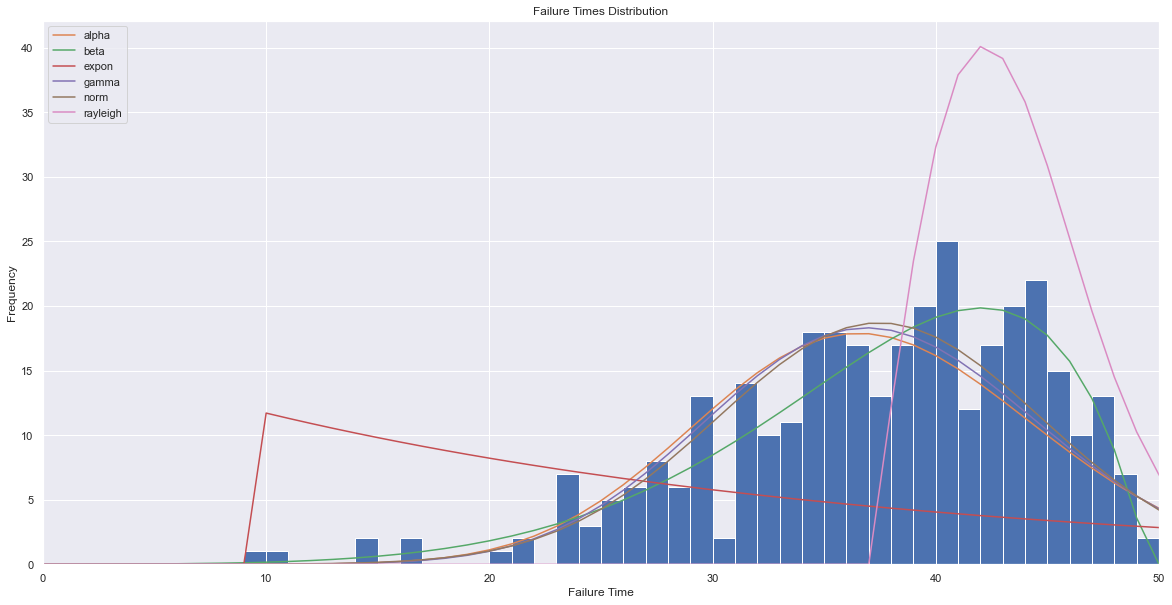

In [72]:
# Build histogram
plt.figure(figsize=(20,10))
h = plt.hist(y, bins=range(51))

# List the distributions to be fitted
dist_names = ['alpha', 'beta', 'expon', 'gamma', 'norm', 'rayleigh']

# Fit the distributions to the data and plot their probability density functions
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,50)
plt.legend(loc='upper left')
plt.title("b")
plt.xlabel("Failure Time")
plt.ylabel("Frequency")
plt.show()

In [73]:
# Define the distribution with the best fit
dist = getattr(scipy.stats, 'beta')

# Fit the distribution to the data
param = dist.fit(y)

# Distribution parameters (e.g. 'a', 'b' for beta distribution)
args = param[:-2]

# Location parameter
loc = param[-2]

# Scale parameter
scale = param[-1]